In [17]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("Task 3 and 4_Loan_Data.csv")

In [4]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [6]:
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']
    
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']

In [9]:
clf_log = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
#print(clf_log.coef_, clf_log.intercept_)

In [10]:
clf_knn = KNeighborsClassifier(n_neighbors=5).fit(df[features], df['default'])

In [11]:
clf_rm = RandomForestClassifier(n_estimators=100, random_state=42).fit(df[features],df["default"])

In [21]:
y_pred_log=clf_log.predict(df[features])
y_pred_knn=clf_knn.predict(df[features])
y_pred_rf=clf_rm.predict(df[features])

Text(20.72222222222222, 0.5, 'True')

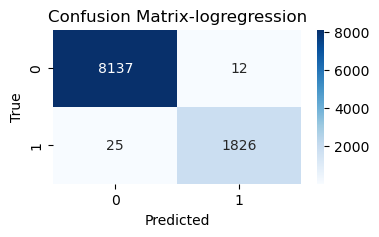

In [22]:
cm_log=metrics.confusion_matrix(df["default"],y_pred_log)
plt.figure(figsize=(4,2))
sns.heatmap(cm_log,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-logregression")
plt.xlabel("Predicted")
plt.ylabel("True")

Text(20.72222222222222, 0.5, 'True')

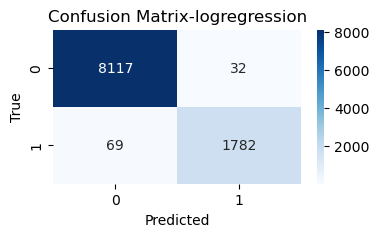

In [23]:
cm_knn=metrics.confusion_matrix(df["default"],y_pred_knn)
plt.figure(figsize=(4,2))
sns.heatmap(cm_knn,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-logregression")
plt.xlabel("Predicted")
plt.ylabel("True")

Text(20.72222222222222, 0.5, 'True')

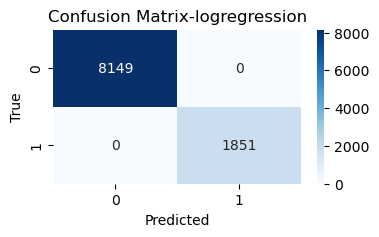

In [24]:
cm_rf=metrics.confusion_matrix(df["default"],y_pred_rf)
plt.figure(figsize=(4,2))
sns.heatmap(cm_rf,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-logregression")
plt.xlabel("Predicted")
plt.ylabel("True")